In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('GBPUSD_open_5year.csv')
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.sort_values(by="Date", inplace=True)
df.set_index('Date', inplace=True)


In [3]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

train_size = int(len(df) * train_ratio)
val_size = int(len(df) * val_ratio)
test_size = len(df) - train_size - val_size

train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

print(f"Training Data: {train_data.shape}")
print(f"Validation Data: {val_data.shape}")
print(f"Test Data: {test_data.shape}")

Training Data: (840, 3)
Validation Data: (180, 3)
Test Data: (180, 3)


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data[['Open', 'Time']])

X_train_scaled = scaler.transform(train_data[['Open', 'Time']])
X_val_scaled = scaler.transform(val_data[['Open', 'Time']])
X_test_scaled = scaler.transform(test_data[['Open', 'Time']])



In [5]:
y_train = train_data['Open'].values
y_val = val_data['Open'].values
y_test = test_data['Open'].values

In [6]:
def time_sequence_generator(X, y, time_interval):
    X_range, y_range = [], []
    for i in range(len(X) - time_interval):
        X_range.append(X[i:i+time_interval])
        y_range.append(y[i+time_interval])
    return np.array(X_range), np.array(y_range)

In [7]:
time_interval= 60

X_train_seq, y_train_seq = time_sequence_generator(X_train_scaled, y_train, time_interval)
X_val_seq, y_val_seq = time_sequence_generator(X_val_scaled, y_val, time_interval)
X_test_seq, y_test_seq = time_sequence_generator(X_test_scaled, y_test, time_interval)

print(f"Shape of X_train: {X_train_seq.shape}")
print(f"Shape of X_val: {X_val_seq.shape}")
print(f"Shape of X_test: {X_test_seq.shape}")

Shape of X_train: (780, 60, 2)
Shape of X_val: (120, 60, 2)
Shape of X_test: (120, 60, 2)


In [8]:
# Build LSTM Model
#lstm_model = Sequential()
#lstm_model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
#lstm_model.add(LSTM(units=32))
#lstm_model.add(Dense(units=16, activation='relu'))
#lstm_model.add(Dense(units=8, activation='relu'))
#lstm_model.add(Dense(units=1))  # Output layer

# Compile model
#lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train model
#history = lstm_model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_data=(X_val_seq, y_val_seq))



In [9]:
# Build modelt

lstm_model = Sequential()
lstm_model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(units=32, return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(units=16, return_sequences=False))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(units=8, activation='relu'))
lstm_model.add(Dense(units=4, activation='relu'))

# Output layer
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

history = lstm_model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_data=(X_val_seq, y_val_seq))

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.6067 - mae: 0.6620 - mse: 0.6067 - val_loss: 0.0182 - val_mae: 0.1336 - val_mse: 0.0182
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1023 - mae: 0.2548 - mse: 0.1023 - val_loss: 0.0017 - val_mae: 0.0380 - val_mse: 0.0017
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0548 - mae: 0.1901 - mse: 0.0548 - val_loss: 6.1747e-04 - val_mae: 0.0214 - val_mse: 6.1747e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0497 - mae: 0.1773 - mse: 0.0497 - val_loss: 2.1664e-04 - val_mae: 0.0108 - val_mse: 2.1664e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0400 - mae: 0.1584 - mse: 0.0400 - val_loss: 0.0016 - val_mae: 0.0376 - val_mse: 0.0016
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0428 - mae: 0.1653 - mse: 0.0428 - val_loss: 0.0014 - val_mae: 0.0360 - val_mse: 0.0014
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0379 - mae: 0.1594 - m

In [10]:
test_loss = lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss (LSTM): {test_loss}")

y_pred = lstm_model.predict(X_test_seq)

y_pred = scaler.inverse_transform(np.column_stack((y_pred, np.zeros(y_pred.shape))))[:, 0]
y_test_actual = scaler.inverse_transform(np.column_stack((y_test_seq.reshape(-1, 1), np.zeros(y_test_seq.shape))))[:, 0]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0071 - mae: 0.0831 - mse: 0.0071
Test Loss (LSTM): [0.006138687487691641, 0.07675240933895111, 0.006138687487691641]
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


In [11]:
mae_lstm = mean_absolute_error(y_test_actual, y_pred)
mse_lstm = mean_squared_error(y_test_actual, y_pred)
r2_lstm = r2_score(y_test_actual, y_pred)
mape_lstm = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100 

print(f"LSTM Model Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"Mean Squared Error (MSE): {mse_lstm:.4f}")
print(f"R² Score: {r2_lstm:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lstm:.2f}%")


LSTM Model Performance on Test Data:
Mean Absolute Error (MAE): 0.0271
Mean Squared Error (MSE): 0.0008
R² Score: -5.9583
Mean Absolute Percentage Error (MAPE): 1.77%


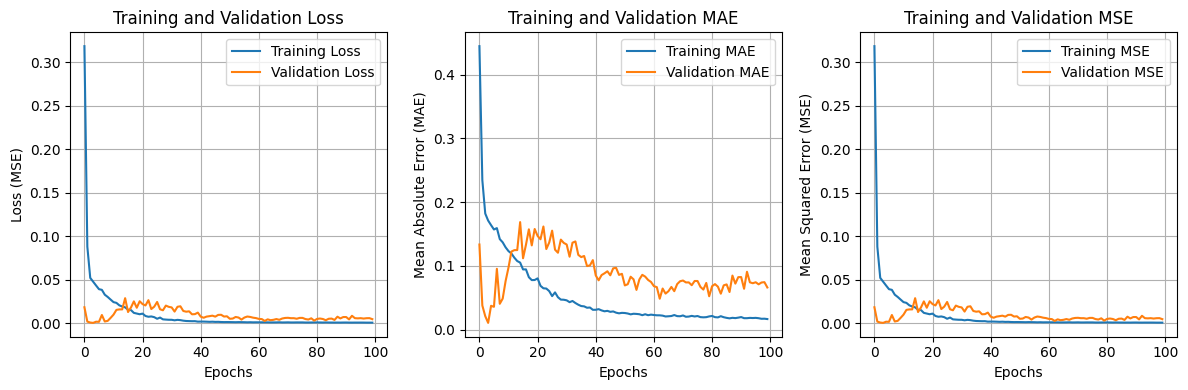

In [12]:
history_dict = history.history

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(history_dict['mae'], label='Training MAE')
plt.plot(history_dict['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)

# MSE Plot
plt.subplot(1, 3, 3)
plt.plot(history_dict['mse'], label='Training MSE')
plt.plot(history_dict['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()